In [1]:
# !conda install -c conda-forge scienceplots -y

In [2]:
import pandas as pd
import matplotlib as mpl
# mpl.use("pgf")

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, PercentFormatter

In [3]:
# plt.style.use(['science', 'ieee'])
mpl.rcParams.update({
    "pgf.texsystem": 'pdflatex',
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": [],
    "pgf.rcfonts": False,
    "pgf.preamble": "\n".join([
      r'\usepackage{amsmath}',
      r"\usepackage[utf8x]{inputenc}",
      r"\usepackage[T1]{fontenc}",
      r"\usepackage{cmbright}",
    ]),
})

In [4]:
color_map = {
    "ARM-CMSIS-DSP": "C0",
    "CMSIS-DSP": "C0",
    "TillJIT": "C1",
    "tIlljIt": "C1",
    "TillJIT-4x6": "C1",
    "TillJIT-4x3": "C2",
    "TillJIT-04.06.": 'C2',
    "JIT": "C1",
    "ReferenceCM": "C3",
    "Peak": "C4",
    "Intrinsics": "C5"
}

In [5]:
def calculateSpeedup(data, name1='TillJIT-04.06.', name2='ARM-CMSIS-DSP'):
    # Filter data for TillJIT and ARM-CMSIS-DSP
    tilljit_data = data[data['Type'] == name1]
    arm_data = data[data['Type'] == name2]

    # Merge datasets on common dimensions (M, K, N)
    merged_data = pd.merge(tilljit_data, arm_data, on=['M', 'K', 'N'], suffixes=('_tilljit', '_arm'))

    # Calculate speedup (TillJIT GFLOPS / ARM GFLOPS)
    merged_data['Speedup'] = merged_data['GFLOPS_tilljit'] / merged_data['GFLOPS_arm']

    # Calculate statistics
    average_speedup = merged_data['Speedup'].mean()
    median_speedup = merged_data['Speedup'].median()
    maximum_speedup = merged_data['Speedup'].max()
    minimum_speedup = merged_data['Speedup'].min()

    print(f"Speedup Statistics ({name1} over {name2}):")
    print(f"Average Speedup: {average_speedup:.2f}x")
    print(f"Median Speedup: {median_speedup:.2f}x")
    print(f"Maximum Speedup: {maximum_speedup:.2f}x")
    print(f"Minimum Speedup: {minimum_speedup:.2f}x")

def plotFigure(csvPath, plotOver, peakPerf, xlabel, title, pgf_name, mark_intrinsics=False):
    plt.clf()
    fig, ax = plt.subplots()
    data = pd.read_csv(csvPath, sep=";")

    plt.figure(figsize=(10, 6))
    for type_exec in data['Type'].unique():
        subset = data[data['Type'] == type_exec]
        if type_exec == "Intrinsics" and mark_intrinsics:
            ax.plot(subset[plotOver], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'), linestyle='-.', marker='^')
        else:
            ax.plot(subset[plotOver], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'))


    ax.axhline(y=peakPerf, color=color_map.get(type_exec, 'black'), linestyle='--', label='Peak')
    ax.set_xticks([i for i in range(0, 241, 24)])
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=3)) # 0, 8, 16, 24 ...
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2)) # 0, 0.1, 0.2 ...
    ax.tick_params(axis='x', which='minor', length=2, direction='out')
    ax.tick_params(axis='y', which='minor', length=2, direction='out')

    ax2 = ax.twinx()
    ax2.set_ylabel("GFLOPS (Peak Performance)")
    ax2.yaxis.set_major_formatter(PercentFormatter(xmax=peakPerf))
    ymin, ymax = ax.get_ylim()
    ax2.set_ylim(ymin, ymax)
    ax2.plot([],[])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('GFLOPS')
    ax.legend(loc='right', bbox_to_anchor=(1, 0.35))
    ax.grid(True)
    ax.set_title(title)
    plt.show()
    fig.savefig("pgf_export/" + pgf_name, format='pgf', backend='pgf')
    return data, fig, ax

<Figure size 640x480 with 0 Axes>

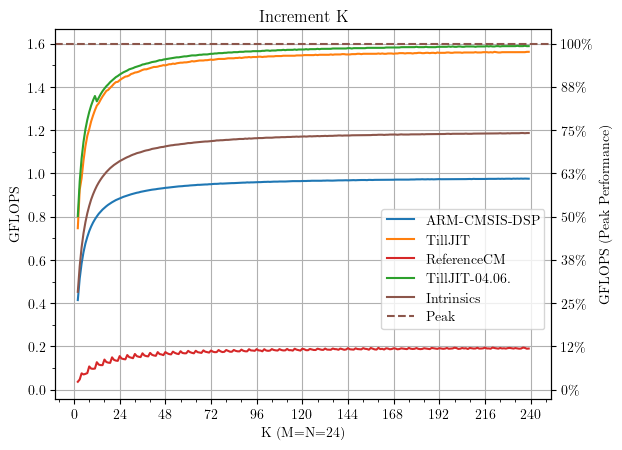

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.64x
Median Speedup: 1.63x
Maximum Speedup: 1.94x
Minimum Speedup: 1.63x


In [6]:
data, fig, ax = plotFigure('gemm_growing_k.csv', 'K', 1.6, 'K (M=N=24)', "Increment K", "grow_k.pgf")
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

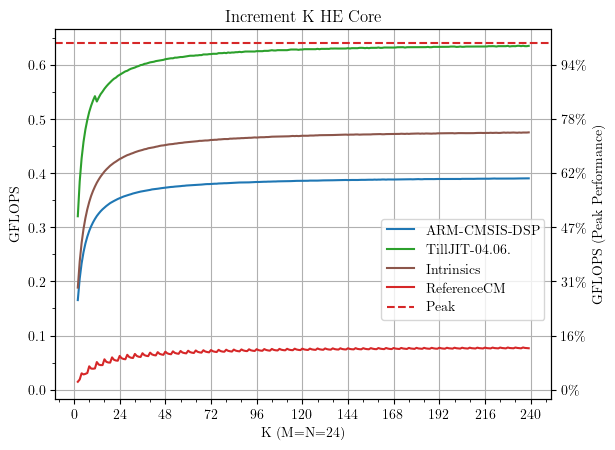

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.64x
Median Speedup: 1.63x
Maximum Speedup: 1.94x
Minimum Speedup: 1.63x


In [7]:
data, fig, ax = plotFigure('gemm_growing_k_he.csv', 'K', 0.64, 'K (M=N=24)', "Increment K HE Core", "grow_k_he.pgf")
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

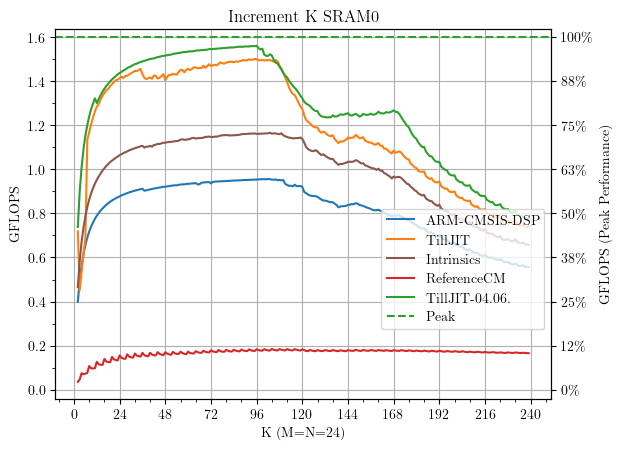

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.55x
Median Speedup: 1.55x
Maximum Speedup: 1.85x
Minimum Speedup: 1.39x


In [8]:
data, _, _ = plotFigure('gemm_growing_k_sram0.csv', 'K', 1.6, 'K (M=N=24)', "Increment K SRAM0", "grow_k_sram0.pgf")
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

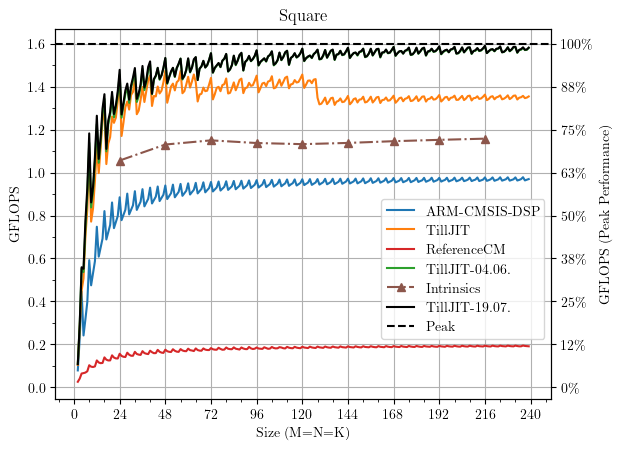

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-19.07. over ARM-CMSIS-DSP):
Average Speedup: 1.64x
Median Speedup: 1.63x
Maximum Speedup: 2.45x
Minimum Speedup: 1.25x


In [67]:
data, _, _ = plotFigure('gemm_square_all.csv', 'M', 1.6, 'Size (M=N=K)', 'Square', 'square.pgf', True)
calculateSpeedup(data, "TillJIT-19.07.", "ARM-CMSIS-DSP")

<Figure size 640x480 with 0 Axes>

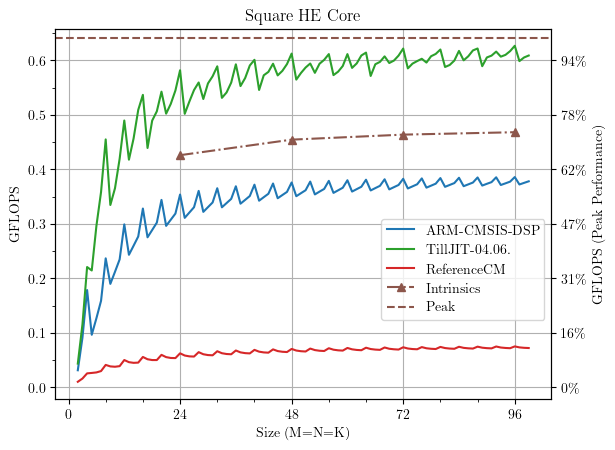

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.65x
Median Speedup: 1.63x
Maximum Speedup: 2.34x
Minimum Speedup: 1.24x


In [10]:
data, _, _ = plotFigure('gemm_square_he.csv', 'M', 0.64, 'Size (M=N=K)', "Square HE Core", "square_he.pgf", True)
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

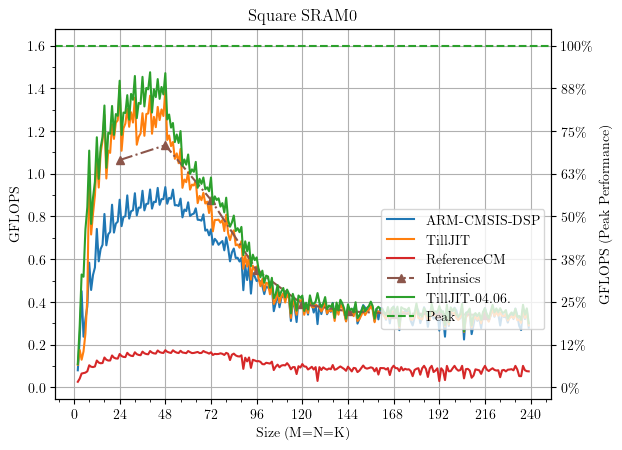

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.22x
Median Speedup: 1.11x
Maximum Speedup: 2.33x
Minimum Speedup: 0.95x


In [11]:
data, _, _ = plotFigure('gemm_square_sram0.csv', 'M', 1.6, 'Size (M=N=K)', 'Square SRAM0', 'square_sram0.pgf', True)
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

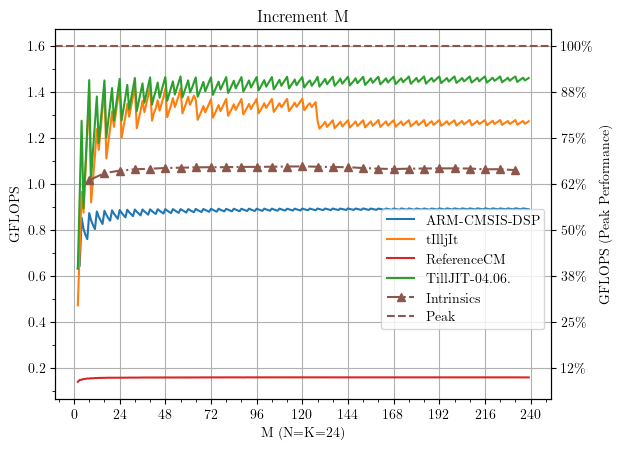

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.61x
Median Speedup: 1.63x
Maximum Speedup: 1.66x
Minimum Speedup: 1.00x


In [12]:
data, _, _ = plotFigure('gemm_growing_m.csv', 'M', 1.6, 'M (N=K=24)', 'Increment M', 'grow_m.pgf', True)
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

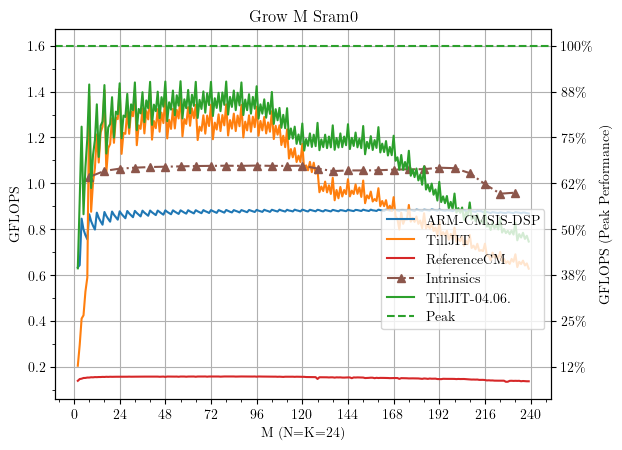

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.33x
Median Speedup: 1.37x
Maximum Speedup: 1.65x
Minimum Speedup: 0.86x


In [13]:
data, _, _ = plotFigure('gemm_growing_m_sram0.csv', 'M', 1.6, 'M (N=K=24)', "Grow M Sram0", 'grow_m_sram0.pgf', True)
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

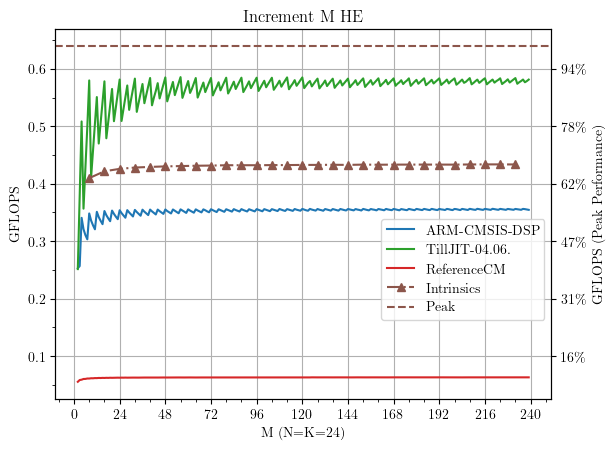

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.60x
Median Speedup: 1.62x
Maximum Speedup: 1.66x
Minimum Speedup: 0.99x


In [14]:
data, _, _ = plotFigure('gemm_growing_m_he.csv', 'M', 0.64, 'M (N=K=24)', 'Increment M HE', 'grow_m_he.pgf', True)
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

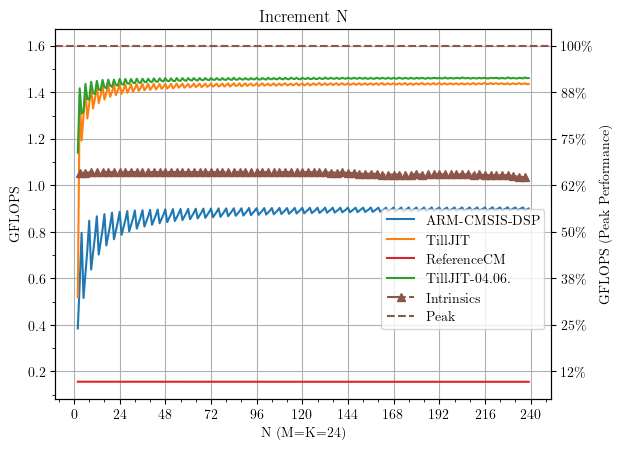

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.67x
Median Speedup: 1.64x
Maximum Speedup: 2.96x
Minimum Speedup: 1.61x


In [15]:
data, _, _ = plotFigure('gemm_growing_n.csv', 'N', 1.6, 'N (M=K=24)', 'Increment N', 'grow_n.pgf', True)
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

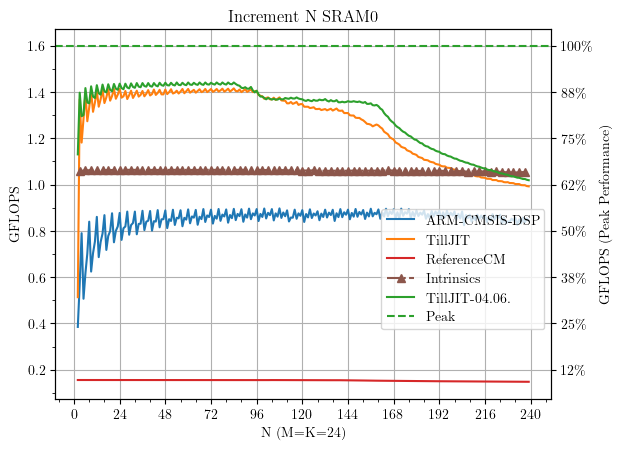

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.55x
Median Speedup: 1.58x
Maximum Speedup: 2.94x
Minimum Speedup: 1.19x


In [16]:
data, _, _ = plotFigure('gemm_growing_n_sram0.csv', 'N', 1.6, 'N (M=K=24)', 'Increment N SRAM0', 'grow_n_sram0.pgf', True)
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

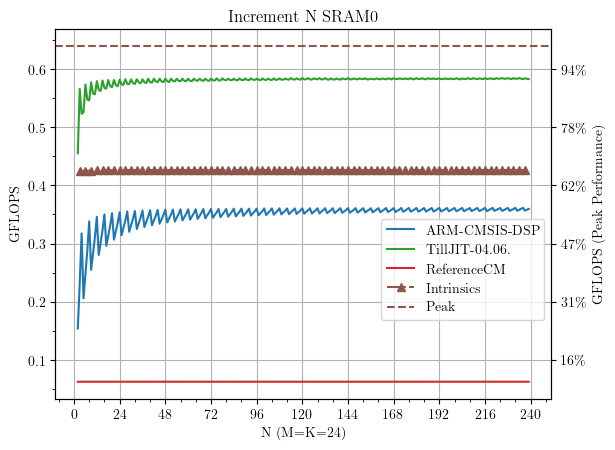

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-04.06. over ARM-CMSIS-DSP):
Average Speedup: 1.67x
Median Speedup: 1.64x
Maximum Speedup: 2.96x
Minimum Speedup: 1.61x


In [17]:
data, _, _ = plotFigure('gemm_growing_n_he.csv', 'N', 0.64, 'N (M=K=24)', 'Increment N SRAM0', 'grow_n_he.pgf', True)
calculateSpeedup(data)

<Figure size 640x480 with 0 Axes>

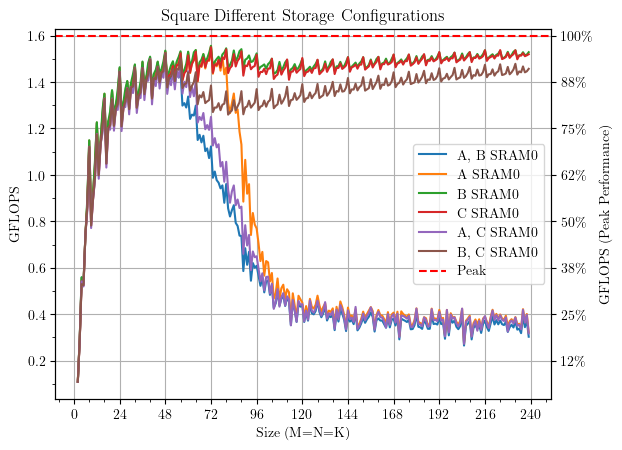

<Figure size 640x480 with 0 Axes>

In [18]:
plt.clf()
fig, ax = plt.subplots()

data = pd.read_csv('gemm_square_ab_sram0.csv', sep=";")
plt.plot(data['M'], data['GFLOPS'], label="A, B SRAM0")

data = pd.read_csv('gemm_square_a_sram0.csv', sep=";")
plt.plot(data['M'], data['GFLOPS'], label="A SRAM0")

data = pd.read_csv('gemm_square_b_sram0.csv', sep=";")
plt.plot(data['M'], data['GFLOPS'], label="B SRAM0")

data = pd.read_csv('gemm_square_c_sram0.csv', sep=";")
ax.plot(data['M'], data['GFLOPS'], label="C SRAM0")

data = pd.read_csv('gemm_square_ac_sram0.csv', sep=";")
ax.plot(data['M'], data['GFLOPS'], label="A, C SRAM0")

data = pd.read_csv('gemm_square_bc_sram0.csv', sep=";")
ax.plot(data['M'], data['GFLOPS'], label="B, C SRAM0")

ax.axhline(y=1.6, color='r', linestyle='--', label='Peak')
ax.set_xticks([i for i in range(0, 241, 24)])
ax.xaxis.set_minor_locator(AutoMinorLocator(n=3)) # 0, 8, 16, 24 ...
ax.yaxis.set_minor_locator(AutoMinorLocator(n=2)) # 0, 0.1, 0.2 ...
ax.tick_params(axis='x', which='minor', length=2, direction='out')
ax.tick_params(axis='y', which='minor', length=2, direction='out')
ax.set_xlabel('Size (M=N=K)')
ax.set_ylabel('GFLOPS')
ax2 = ax.twinx()
ax2.set_ylabel("GFLOPS (Peak Performance)")
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=1.6))
ymin, ymax = ax.get_ylim()
ax2.set_ylim(ymin, ymax)
ax2.plot([],[])

#plt.legend(loc='lower right')
ax.legend()
ax.grid(True)
ax.set_title("Square Different Storage Configurations")
plt.show()
plt.savefig("pgf_export/square_storage.pgf", format='pgf', backend='pgf')


<Figure size 640x480 with 0 Axes>

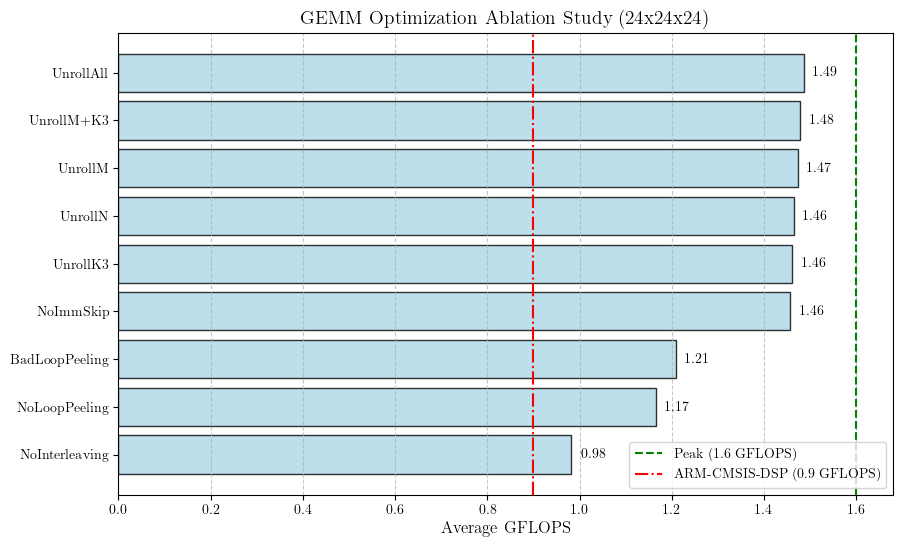

In [19]:
data = pd.read_csv('ablation.csv', sep=";")
plt.clf()
fig, ax = plt.subplots(figsize=(10, 6))

average_gflops = data.groupby('Test')['GFLOPS'].mean().sort_values(ascending=True)

bars = ax.barh(range(len(average_gflops)), average_gflops.values, 
               color='lightblue', edgecolor='black', alpha=0.8)

for i, (test, value) in enumerate(average_gflops.items()):
    add = 0.02 if round(value, 2) != 0.87 else 0.05
    ax.text(value + add, i, f'{value:.2f}', 
            va='center', ha='left', fontweight='bold')

ax.set_yticks(range(len(average_gflops)))
ax.set_yticklabels(average_gflops.index, fontsize=10)
ax.set_xlabel('Average GFLOPS', fontsize=12)
ax.set_title('GEMM Optimization Ablation Study (24x24x24)', fontsize=14, fontweight='bold')

# Add reference lines
ax.axvline(x=1.6, color='green', linestyle='--', label='Peak (1.6 GFLOPS)')
ax.axvline(x=0.9, color='red', linestyle='-.', label='ARM-CMSIS-DSP (0.9 GFLOPS)')

# Grid and legend
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.legend(loc='lower right')

# Set x-axis limits with some padding
#ax.set_xlim(0, max(average_gflops.values) * 1.1)
plt.savefig("pgf_export/ablation.pgf", format='pgf', backend='pgf')

plt.show()

In [20]:
data = pd.read_csv('ablation.csv', sep=";")
data['IPC'] = round(data['InstrCount'] / data['Cycles'], 2)
data
data.to_csv('ablation.csv', sep=";", index=False)

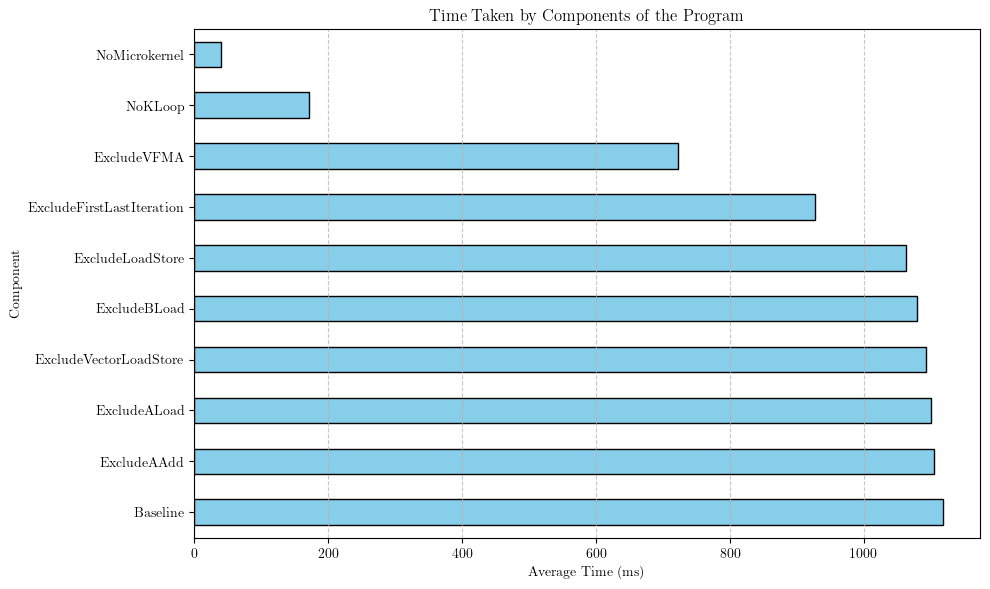

In [21]:
# Load the data
data = pd.read_csv('components_exclude.csv', sep=";")
data['Time'] = data['Time'].abs()
# Group by 'Test' and calculate the average time for each component
average_time = data.groupby('Test')['Time'].mean().sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
average_time.plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Average Time (ms)')
plt.ylabel('Component')
plt.title('Time Taken by Components of the Program')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

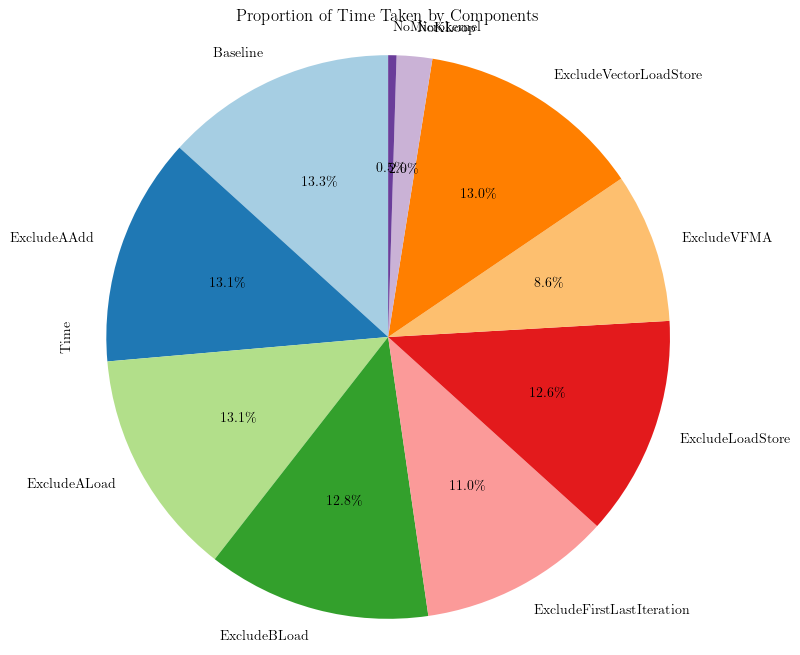

In [22]:
data = pd.read_csv('components_exclude.csv', sep=";")

# Take the absolute value of the 'Time' column
data['Time'] = data['Time'].abs()

# Group by 'Test' and calculate the total time for each component
total_time = data.groupby('Test')['Time'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
total_time.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Proportion of Time Taken by Components')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

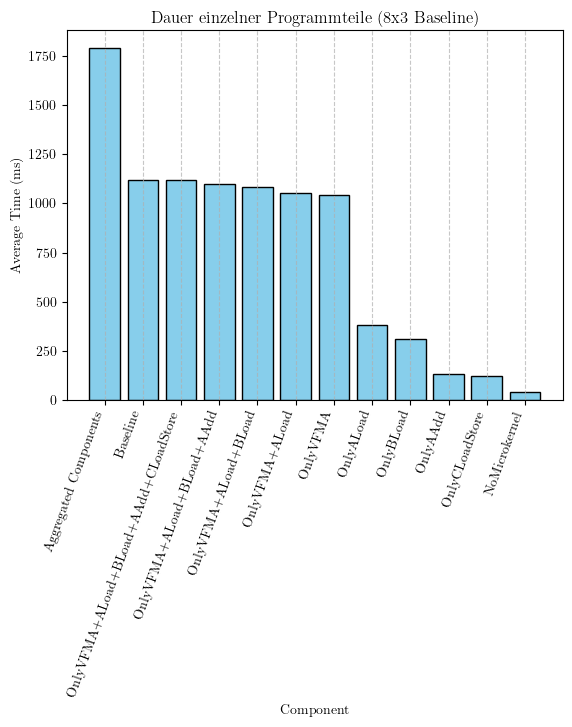

In [23]:
# Load the data
data = pd.read_csv('components_include_additive.csv', sep=";")
data['Time'] = data['Time'].abs()

average_time = data.groupby('Test')['Time'].mean().reset_index()
nomicrokernel_time = data[data['Test'] == 'NoMicrokernel']['Time'].mean()
aggregated_value = average_time[average_time['Test'].isin(['NoMicrokernel', 'OnlyCLoadStore', 'OnlyAAdd', 'OnlyBLoad', 'OnlyALoad', 'OnlyVFMA'])]['Time'].sum()
aggregated_value -= 6 * nomicrokernel_time

# Add the aggregated value as a new row using pd.concat
aggregated_row = pd.DataFrame({'Test': ['Aggregated Components'], 'Time': [aggregated_value]})
aggregated_data = pd.concat([average_time, aggregated_row], ignore_index=True)
aggregated_data = aggregated_data.sort_values(by='Time', ascending=False)


# Create a horizontal bar plot
plt.bar(aggregated_data['Test'], aggregated_data['Time'], color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel('Average Time (ms)')
plt.xlabel('Component')
plt.title('Dauer einzelner Programmteile (8x3 Baseline)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=70, ha='right')

# Show the plot
plt.show()

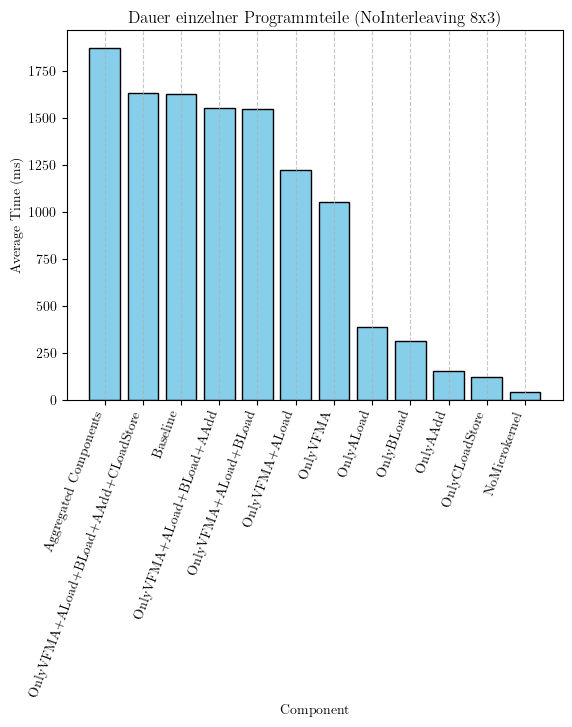

In [24]:
# Load the data
data = pd.read_csv('components_include_additive_slow.csv', sep=";")
data['Time'] = data['Time'].abs()

average_time = data.groupby('Test')['Time'].mean().reset_index()
nomicrokernel_time = data[data['Test'] == 'NoMicrokernel']['Time'].mean()
aggregated_value = average_time[average_time['Test'].isin(['NoMicrokernel', 'OnlyCLoadStore', 'OnlyAAdd', 'OnlyBLoad', 'OnlyALoad', 'OnlyVFMA'])]['Time'].sum()
aggregated_value -= 5 * nomicrokernel_time

# Add the aggregated value as a new row using pd.concat
aggregated_row = pd.DataFrame({'Test': ['Aggregated Components'], 'Time': [aggregated_value]})
aggregated_data = pd.concat([average_time, aggregated_row], ignore_index=True)
aggregated_data = aggregated_data.sort_values(by='Time', ascending=False)

# Create a horizontal bar plot
plt.bar(aggregated_data['Test'], aggregated_data['Time'], color='skyblue', edgecolor='black')

# Add labels and title
plt.ylabel('Average Time (ms)')
plt.xlabel('Component')
plt.title('Dauer einzelner Programmteile (NoInterleaving 8x3)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(rotation=70, ha='right')

# Show the plot
plt.show()

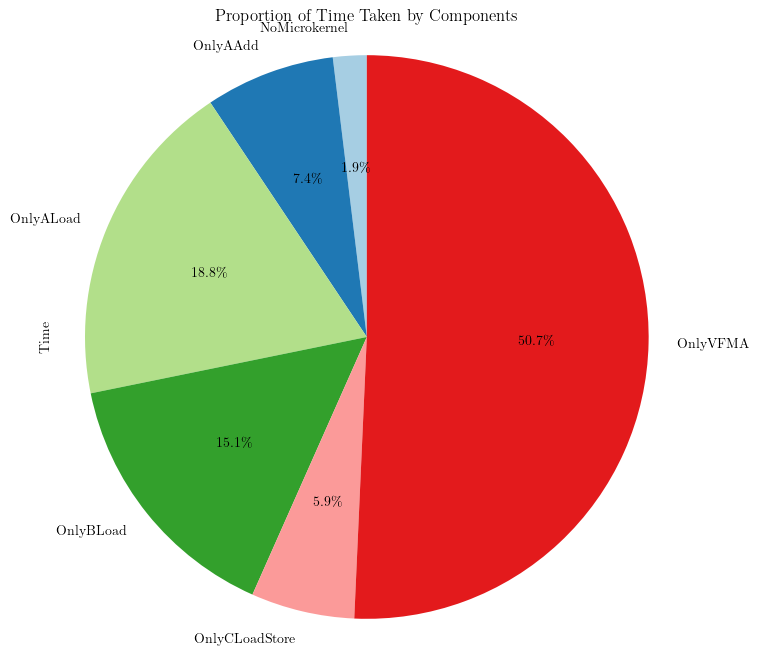

In [25]:
data = pd.read_csv('components_include_additive_slow.csv', sep=";")

# Take the absolute value of the 'Time' column
data['Time'] = data['Time'].abs()

# Group by 'Test' and calculate the total time for each component
total_time = data[data['Test'].isin(['NoMicrokernel', 'OnlyCLoadStore', 'OnlyAAdd', 'OnlyBLoad', 'OnlyALoad', 'OnlyVFMA'])].groupby('Test')['Time'].mean()

# Create the pie chart
plt.figure(figsize=(8, 8))
total_time.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Proportion of Time Taken by Components')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

In [26]:
def filter_microkernel(data, defM=8, defN=3):
    def use46(row):
        m, n = row['M'], row['N']
        cond1 = (m <= 4) and (n > 3)
        cond2 = (
            (m % defM != 0) and (m % defM <= 4) and ((n - (n % defN)) % 6 == 0)
        )
        cond3 = n > 3
        return (cond1 or cond2) and cond3
    
    mask = data.apply(use46, axis=1)
    return data[mask]


def plotFigure4x36(csvPath, plotOver, peakPerf, xlabel, title, pgf_name, mark_intrinsics=False):
    plt.clf()
    fig, ax = plt.subplots()
    data1 = pd.read_csv(csvPath, sep=";")
    data = filter_microkernel(data1)
    plt.figure(figsize=(10, 6))
    for type_exec in data['Type'].unique():
        subset = data[data['Type'] == type_exec]
        ax.plot(subset[plotOver], subset['GFLOPS'], label=type_exec, color=color_map.get(type_exec, 'black'), linestyle='-.', marker='^')


    ax.axhline(y=peakPerf, color=color_map.get(type_exec, 'black'), linestyle='--', label='Peak')
    ax.set_xticks([i for i in range(0, 241, 24)])
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=3)) # 0, 8, 16, 24 ...
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=2)) # 0, 0.1, 0.2 ...
    ax.tick_params(axis='x', which='minor', length=2, direction='out')
    ax.tick_params(axis='y', which='minor', length=2, direction='out')

    ax2 = ax.twinx()
    ax2.set_ylabel("GFLOPS (Peak Performance)")
    ax2.yaxis.set_major_formatter(PercentFormatter(xmax=peakPerf))
    ymin, ymax = ax.get_ylim()
    ax2.set_ylim(ymin, ymax)
    ax2.plot([],[])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('GFLOPS')
    ax.legend(loc='right', bbox_to_anchor=(1, 0.35))
    ax.grid(True)
    ax.set_title(title)
    plt.show()
    fig.savefig("pgf_export/" + pgf_name, format='pgf', backend='pgf')
    return data, fig, ax

<Figure size 640x480 with 0 Axes>

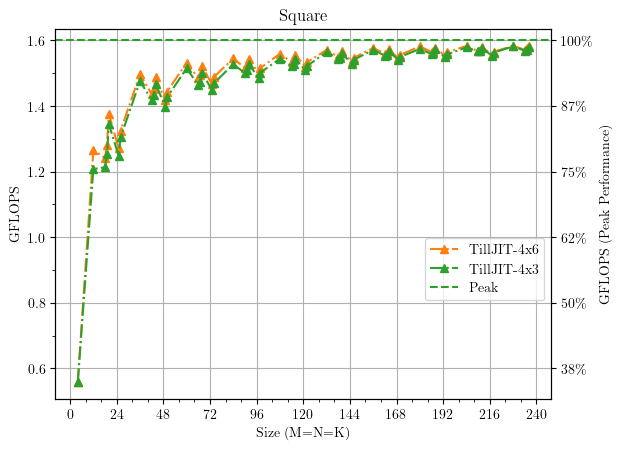

<Figure size 1000x600 with 0 Axes>

Speedup Statistics (TillJIT-4x6 over TillJIT-4x3):
Average Speedup: 1.01x
Median Speedup: 1.01x
Maximum Speedup: 1.05x
Minimum Speedup: 1.00x


In [27]:
data, _, _ = plotFigure4x36('4x6_tests.csv', 'M', 1.6, 'Size (M=N=K)', 'Square', 'square4x6.pgf', True)
calculateSpeedup(data, "TillJIT-4x6", "TillJIT-4x3")

In [28]:
data

,Test,M,K,N,Type,GFLOPS,Time,Iterations,Correct
2,Square,4,4,4,TillJIT-4x6,0.558854,2863,12500000,1
10,Square,12,12,12,TillJIT-4x6,1.264820,1265,462962,1
16,Square,18,18,18,TillJIT-4x6,1.242234,1288,137174,1
17,Square,19,19,19,TillJIT-4x6,1.282050,1248,116635,1
18,Square,20,20,20,TillJIT-4x6,1.375752,1163,100000,1
...,...,...,...,...,...,...,...,...,...
454,Square,218,218,218,TillJIT-4x3,1.562660,1021,77,1
464,Square,228,228,228,TillJIT-4x3,1.581888,1004,67,1
470,Square,234,234,234,TillJIT-4x3,1.568411,1013,62,1
471,Square,235,235,235,TillJIT-4x3,1.570735,1008,61,1


In [63]:
def plotFigureAllSizes(csvPath, plotOver, peakPerf, xlabel, title, pgf_name, mark_intrinsics=False):
    plt.clf()
    fig, ax = plt.subplots()
    data = pd.read_csv(csvPath, sep=";")
    tilljit_data = data[data['Type'] == "TillJIT"]
    arm_data = data[data['Type'] == "ARM-CMSIS-DSP"]

    # Merge datasets on common dimensions (M, K, N)
    merged_data = pd.merge(tilljit_data, arm_data, on=['M', 'K', 'N'], suffixes=('_tilljit', '_arm'))

    # Calculate speedup (TillJIT GFLOPS / ARM GFLOPS)
    merged_data['Speedup'] = merged_data['GFLOPS_tilljit'] / merged_data['GFLOPS_arm']
    merged_data = merged_data.sort_values('Speedup')
    plt.figure(figsize=(10, 6))
    ax.plot(range(len(merged_data)), merged_data['Speedup'], label='Speedup', color=color_map.get('JIT', 'black'))


    ax.axhline(y=merged_data['Speedup'].mean(), color=color_map.get('JIT', 'black'), linestyle='--', label='Durchschnittlicher Speedup')
    # ax.set_xticks([i for i in range(0, 241, 24)])
    # ax.xaxis.set_minor_locator(AutoMinorLocator(n=3)) # 0, 8, 16, 24 ...
    # ax.yaxis.set_minor_locator(AutoMinorLocator(n=2)) # 0, 0.1, 0.2 ...
    ax.tick_params(axis='x', which='minor', length=2, direction='out')
    ax.tick_params(axis='y', which='minor', length=2, direction='out')

    # ax2 = ax.twinx()
    # ax2.set_ylabel("GFLOPS (Peak Performance)")
    # ax2.yaxis.set_major_formatter(PercentFormatter(xmax=peakPerf))
    # ymin, ymax = ax.get_ylim()
    # ax2.set_ylim(ymin, ymax)
    # ax2.plot([],[])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Speedup')
    ax.legend(loc='right', bbox_to_anchor=(1, 0.35))
    ax.grid(True)
    ax.set_title(title)
    plt.show()
    fig.savefig("pgf_export/" + pgf_name, format='pgf', backend='pgf')
    return merged_data, fig, ax

<Figure size 640x480 with 0 Axes>

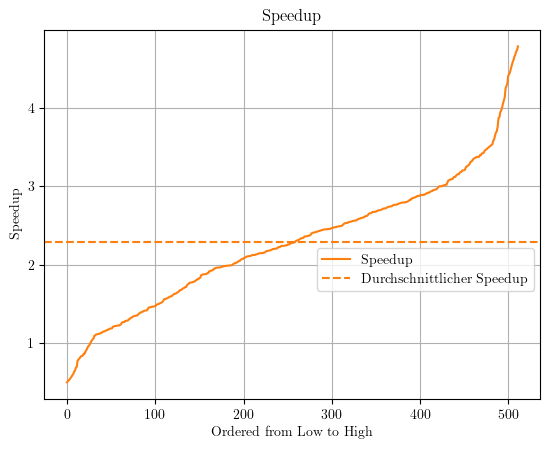

<Figure size 1000x600 with 0 Axes>

In [68]:
data1, _, _ = plotFigureAllSizes('gemm_all_sizes.csv', 'M', 1.6, 'Ordered from Low to High', 'Speedup', 'speedup_all_sizes.pgf', True)
# calculateSpeedup(data1, "TillJIT", "ARM-CMSIS-DSP")

In [52]:
data1

,Test_tilljit,M,K,N,Type_tilljit,GFLOPS_tilljit,Time_tilljit,Iterations_tilljit,Correct_tilljit,Test_arm,Type_arm,GFLOPS_arm,Time_arm,Iterations_arm,Correct_arm,Speedup
0,Square,1,1,1,TillJIT,0.016393,1220,10000000,1,Square,ARM-CMSIS-DSP,0.012361,1618,10000000,1,1.326187
1,Square,1,2,1,TillJIT,0.030303,1320,10000000,1,Square,ARM-CMSIS-DSP,0.017087,2341,10000000,1,1.773454
2,Square,1,3,1,TillJIT,0.041522,1445,10000000,1,Square,ARM-CMSIS-DSP,0.024341,2465,10000000,1,1.705846
3,Square,1,4,1,TillJIT,0.051020,1568,10000000,1,Square,ARM-CMSIS-DSP,0.030888,2590,10000000,1,1.651774
4,Square,1,5,1,TillJIT,0.059067,1693,10000000,1,Square,ARM-CMSIS-DSP,0.036846,2714,10000000,1,1.603078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Square,3,4,8,TillJIT,0.326731,4897,8333333,1,Square,ARM-CMSIS-DSP,0.253767,6305,8333333,1,1.287524
188,Square,3,5,8,TillJIT,0.362401,4415,6666666,1,Square,ARM-CMSIS-DSP,0.293956,5443,6666666,1,1.232841
189,Square,3,6,8,TillJIT,0.388161,4122,5555555,1,Square,ARM-CMSIS-DSP,0.328677,4868,5555555,1,1.180980
190,Square,3,7,8,TillJIT,0.408789,3914,4761904,1,Square,ARM-CMSIS-DSP,0.358986,4457,4761904,1,1.138732
